In [1]:
import pandas as pd

In [2]:
state = pd.read_csv("statedata.csv")

In [3]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
Population        50 non-null int64
Income            50 non-null int64
Illiteracy        50 non-null float64
Life.Exp          50 non-null float64
Murder            50 non-null float64
HS.Grad           50 non-null float64
Frost             50 non-null int64
Area              50 non-null int64
state.abb         50 non-null object
state.area        50 non-null int64
x                 50 non-null float64
y                 50 non-null float64
state.division    50 non-null object
state.name        50 non-null object
state.region      50 non-null object
dtypes: float64(6), int64(5), object(4)
memory usage: 5.9+ KB


In [4]:
state.head()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

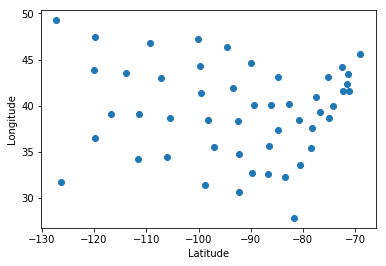

In [7]:
plt.scatter(state['x'], state['y'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

#### Determine which region of the US (West, North Central, South, or Northeast) has the highest average high school graduation rate of all the states in the region

*West*

In [10]:
import numpy as np

In [11]:
pd.crosstab(index = state['HS.Grad'], columns = state['state.region'], margins=True)

state.region,North Central,Northeast,South,West,All
HS.Grad,,,,,
37.8,0,0,1,0,1
38.5,0,0,2,0,2
39.9,0,0,1,0,1
40.6,0,0,1,0,1
41.0,0,0,1,0,1
41.3,0,0,1,0,1
41.6,0,0,1,0,1
41.8,0,0,1,0,1
42.2,0,0,1,0,1


In [12]:
state.groupby('state.region')['HS.Grad'].agg(np.mean)

state.region
North Central    54.516667
Northeast        53.966667
South            44.343750
West             62.000000
Name: HS.Grad, dtype: float64

#### Now, let's make a boxplot of the murder rate by region.

#### Which region has the highest median murder rate?

*South*

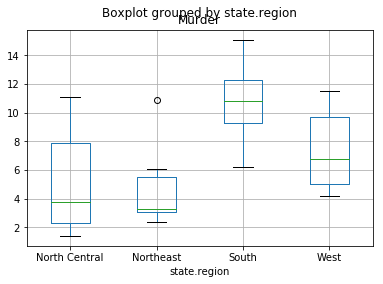

In [16]:
state.boxplot(by='state.region', column=['Murder'])

#### You should see that there is an outlier in the Northeast region of the boxplot you just generated. Which state does this correspond to?

*New York*

In [17]:
state[state['state.region'] == 'Northeast']

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
6,3100,5348,1.1,72.48,3.1,56.0,139,4862,CT,5009,-72.3573,41.5928,New England,Connecticut,Northeast
18,1058,3694,0.7,70.39,2.7,54.7,161,30920,ME,33215,-68.9801,45.6226,New England,Maine,Northeast
20,5814,4755,1.1,71.83,3.3,58.5,103,7826,MA,8257,-71.5800,42.3645,New England,Massachusetts,Northeast
28,812,4281,0.7,71.23,3.3,57.6,174,9027,NH,9304,-71.3924,43.3934,New England,New Hampshire,Northeast
29,7333,5237,1.1,70.93,5.2,52.5,115,7521,NJ,7836,-74.2336,39.9637,Middle Atlantic,New Jersey,Northeast
31,18076,4903,1.4,70.55,10.9,52.7,82,47831,NY,49576,-75.1449,43.1361,Middle Atlantic,New York,Northeast
37,11860,4449,1.0,70.43,6.1,50.2,126,44966,PA,45333,-77.4500,40.9069,Middle Atlantic,Pennsylvania,Northeast
38,931,4558,1.3,71.90,2.4,46.4,127,1049,RI,1214,-71.1244,41.5928,New England,Rhode Island,Northeast
44,472,3907,0.6,71.64,5.5,57.1,168,9267,VT,9609,-72.5450,44.2508,New England,Vermont,Northeast


In [25]:
northEastStates = state[state['state.region'] == 'Northeast']
state.iloc[northEastStates['Murder'].idxmax()]

Population                  18076
Income                       4903
Illiteracy                    1.4
Life.Exp                    70.55
Murder                       10.9
HS.Grad                      52.7
Frost                          82
Area                        47831
state.abb                      NY
state.area                  49576
x                        -75.1449
y                         43.1361
state.division    Middle Atlantic
state.name               New York
state.region            Northeast
Name: 31, dtype: object

#### Build the model with all potential variables included (Population, Income, Illiteracy, Murder, HS.Grad, Frost, and Area).

#### What is the coefficient for "Income" in your linear regression model?

*-0.0000218*

In [26]:
from sklearn import linear_model

In [27]:
linearRegression = linear_model.LinearRegression()

In [28]:
X_train_model1 = state[['Population', 'Income', 'Illiteracy', 'Murder', 'HS.Grad', 'Frost', 'Area']]
y_train_model1 = state[['Life.Exp']]

In [29]:
linearRegression.fit(X_train_model1, y_train_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
print("Intercept ", linearRegression.intercept_)

Intercept  [ 70.94322411]


In [31]:
print("Coefficients of the variables ", linearRegression.coef_)

Coefficients of the variables  [[  5.18003638e-05  -2.18042378e-05   3.38203214e-02  -3.01123170e-01
    4.89294789e-02  -5.73500110e-03  -7.38316614e-08]]


#### Based on the coefficient for 'Income', what is the interpretation of the coefficient x?

- For a one unit increase in income, predicted life expectancy increases by |x|
- For a one unit increase in income, predicted life expectancy decreases by |x|
- For a one unit increase in predicted life expectancy, income decreases by |x|
- For a one unit increase in predicted life expectancy, income increases by |x|

*For a one unit increase in income, predicted life expectancy decreases by |x|*

***

#### Now let's plot a graph of life expectancy vs. income. What appears to be the relationship?

- Life expectancy is somewhat positively correlated with income.
- Life expectancy is somewhat negatively correlated with income.
- Life expectancy is not correlated with income.

*Life expectancy is somewhat positively correlated with income.*

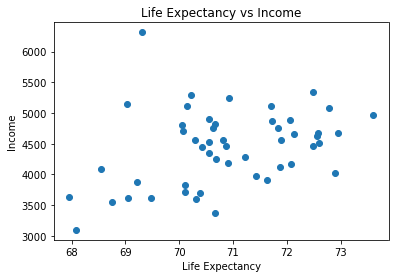

In [32]:
plt.scatter(state['Life.Exp'], state['Income'])
plt.xlabel('Life Expectancy')
plt.ylabel('Income')
plt.title('Life Expectancy vs Income')
plt.show()

***

#### The model we built does not display the relationship we saw from the plot of life expectancy vs. income. Which of the following explanations seems the most reasonable?

- Income is not related to life expectancy.
- Multicollinearity


*Multicollinearity*

#### Although income is an insignificant variable in the model, this does not mean that there is no association between income and life expectancy. However, in the presence of all of the other variables, income does not add statistically significant explanatory power to the model. This means that multicollinearity is probably the issue.

***

#### A model with fewer variables is preferable to a model with many unnnecessary variables. Experiment with removing independent variables from the original model. Remember to use the significance of the coefficients to decide which variables to remove (remove the one with the largest "p-value" first, or the one with the "t value" closest to zero), and to remove them one at a time (this is called "backwards variable selection"). This is important due to multicollinearity issues - removing one insignificant variable may make another previously insignificant variable become significant.

#### You should be able to find a good model with only 4 independent variables, instead of the original 7. Which variables does this model contain?

- Income, HS.Grad, Frost, Murder
- HS.Grad, Population, Income, Frost
- Frost, Murder, HS.Grad, Illiteracy
- Population, Murder, Frost, HS.Grad

*Population, Murder, Frost, HS.Grad*

<font color='green'>First Model</font>

In [33]:
X_train_model2 = state[['Income', 'HS.Grad','Frost', 'Murder']]
y_train_model2 = state[['Life.Exp']]
linearRegressionForModel2 = linear_model.LinearRegression()
linearRegressionForModel2.fit(X_train_model2, y_train_model2)
linearRegressionForModel2.score(X_train_model2, y_train_model2)

0.71472723200290811

<font color = 'green'>Second Model </font>

In [34]:
X_train_model3 = state[['Income', 'HS.Grad','Frost', 'Population']]
y_train_model3 = state[['Life.Exp']]
linearRegressionForModel3 = linear_model.LinearRegression()
linearRegressionForModel3.fit(X_train_model3, y_train_model3)
linearRegressionForModel3.score(X_train_model3, y_train_model3)

0.34267403989142919

<font color = 'green'>Third Model</font>

In [35]:
X_train_model4 = state[['Murder', 'HS.Grad','Frost', 'Illiteracy']]
y_train_model4 = state[['Life.Exp']]
linearRegressionForModel4 = linear_model.LinearRegression()
linearRegressionForModel4.fit(X_train_model4, y_train_model4)
linearRegressionForModel4.score(X_train_model4, y_train_model4)

0.71460844741149976

<font color = 'green'>Fourth Model</font>

In [37]:
X_train_model5 = state[['Murder', 'HS.Grad','Frost', 'Population']]
y_train_model5 = state[['Life.Exp']]
linearRegressionForModel5 = linear_model.LinearRegression()
linearRegressionForModel5.fit(X_train_model5, y_train_model5)
linearRegressionForModel5.score(X_train_model5, y_train_model5)

0.73603277195721351

#### Another idea/method (the right method): We could eliminate the variable "Area" first (since it has the highest p-value, or probability, with a value of 0.9649). Looking at summary after generating it again, we would choose to eliminate "Illiteracy" since it now has the highest p-value of 0.9340. Looking at summary after generating the model again (without those two variables), we would next choose to eliminate "Income", since it has a p-value of 0.9153

#### This model with 4 variables is a good model. However, we can see that the variable "Population" is not quite significant. In practice, it would be up to you whether or not to keep the variable "Population" or eliminate it for a 3-variable model. Population does not add much statistical significance in the presence of murder, high school graduation rate, and frost days.


***

#### Removing insignificant variables changes the Multiple R-squared value of the model. By looking at the summary output for both the initial model (all independent variables) and the simplified model (only 4 independent variables) and using what you learned in class, which of the following correctly explains the change in the Multiple R-squared value?

- We expect the "Multiple R-squared" value of the simplified model to be slightly worse than that of the initial model. It can't be better than the "Multiple R-squared" value of the initial model.
- We expect the "Multiple R-squared" value of the simplified model to be slightly better than that of the initial model. It can't be worse than the "Multiple R-squared" value of the initial model.
- We expect the "Multiple R-squared" of the simplified model to be about the same as the intial model (we have no way of knowing if it will be slightly worse or slightly better than the Multiple R-squared of the intial model).


*We expect the "Multiple R-squared" value of the simplified model to be slightly worse than that of the initial model. It can't be better than the "Multiple R-squared" value of the initial model.*


#### When we remove insignificant variables, the "Multiple R-squared" will always be worse, but only slightly worse. This is due to the nature of a linear regression model. It is always possible for the regression model to make a coefficient zero, which would be the same as removing the variable from the model. The fact that the coefficient is not zero in the intial model means it must be helping the R-squared value, even if it is only a very small improvement. So when we force the variable to be removed, it will decrease the R-squared a little bit. However, this small decrease is worth it to have a simpler model.

#### On the contrary, when we remove insignificant variables, the "Adjusted R-squred" will frequently be better. This value accounts for the complexity of the model, and thus tends to increase as insignificant variables are removed, and decrease as insignificant variables are added.

***

#### Using the simplified 4 variable model that we created, we'll now take a look at how our predictions compare to the actual values.

#### Take a look at the vector of predictions by using the predict function (since we are just looking at predictions on the training set, you don't need to pass a "newdata" argument to the predict function).

#### Which state do we predict to have the lowest life expectancy?

*Alabama*

#### Which state actually has the lowest life expectancy?

*South Carolina*

In [41]:
X_test_model5 = state[['Murder', 'HS.Grad','Frost', 'Population']]
y_predictions = linearRegressionForModel5.predict(X_test_model5)
y_predictions.dtype

dtype('float64')

In [44]:
np.min(y_predictions)

68.481118660367557

In [45]:
state.head()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


In [47]:
y_predictions

array([[ 68.48111866],
       [ 69.85740399],
       [ 71.41415671],
       [ 69.57373881],
       [ 71.79564599],
       [ 71.10354184],
       [ 72.03458972],
       [ 71.12646884],
       [ 70.61539495],
       [ 68.63694227],
       [ 72.09316854],
       [ 71.49989286],
       [ 70.1924416 ],
       [ 70.90158526],
       [ 72.39652876],
       [ 71.90351963],
       [ 69.24417933],
       [ 69.15044846],
       [ 71.86095411],
       [ 70.51851996],
       [ 72.44105391],
       [ 69.8689336 ],
       [ 72.2655962 ],
       [ 69.00535384],
       [ 70.10610031],
       [ 71.40024805],
       [ 72.17032309],
       [ 69.52482393],
       [ 71.72635615],
       [ 71.59612086],
       [ 70.03119055],
       [ 70.62937149],
       [ 69.28624179],
       [ 71.8764945 ],
       [ 71.08548767],
       [ 71.15860042],
       [ 72.41445333],
       [ 71.38045527],
       [ 71.76007018],
       [ 69.06109172],
       [ 72.01160881],
       [ 69.46583349],
       [ 69.97885943],
       [ 72

In [48]:
state.iloc[state['Life.Exp'].idxmin()]

Population                  2816
Income                      3635
Illiteracy                   2.3
Life.Exp                   67.96
Murder                      11.6
HS.Grad                     37.8
Frost                         65
Area                       30225
state.abb                     SC
state.area                 31055
x                       -80.5056
y                         33.619
state.division    South Atlantic
state.name        South Carolina
state.region               South
Name: 39, dtype: object

***

#### Which state do we predict to have the highest life expectancy?

*Washington*

#### Which state actually has the highest life expectancy?

*Hawaii*

In [52]:
y_predictions.max()

72.682724264441859

**Based on the y_predictions above, this seems to correspond to the row number with the value 46**

In [53]:
state.tail()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
45,4981,4701,1.4,70.08,9.5,47.8,85,39780,VA,40815,-78.2005,37.5630,South Atlantic,Virginia,South
46,3559,4864,0.6,71.72,4.3,63.5,32,66570,WA,68192,-119.7460,47.4231,Pacific,Washington,West
47,1799,3617,1.4,69.48,6.7,41.6,100,24070,WV,24181,-80.6665,38.4204,South Atlantic,West Virginia,South
48,4589,4468,0.7,72.48,3.0,54.5,149,54464,WI,56154,-89.9941,44.5937,East North Central,Wisconsin,North Central
49,376,4566,0.6,70.29,6.9,62.9,173,97203,WY,97914,-107.2560,43.0504,Mountain,Wyoming,West


In [54]:
state.iloc[state['Life.Exp'].idxmax()]

Population            868
Income               4963
Illiteracy            1.9
Life.Exp             73.6
Murder                6.2
HS.Grad              61.9
Frost                   0
Area                 6425
state.abb              HI
state.area           6450
x                 -126.25
y                   31.75
state.division    Pacific
state.name         Hawaii
state.region         West
Name: 10, dtype: object

***

#### Take a look at the vector of residuals (the difference between the predicted and actual values).

#### For which state do we make the smallest absolute error?

*Indiana*

#### For which state do we make the largest absolute error?

*Hawaii*

In [55]:
state.dtypes

Population          int64
Income              int64
Illiteracy        float64
Life.Exp          float64
Murder            float64
HS.Grad           float64
Frost               int64
Area                int64
state.abb          object
state.area          int64
x                 float64
y                 float64
state.division     object
state.name         object
state.region       object
dtype: object

In [57]:
residuals = np.absolute(state[['Life.Exp']] - y_predictions)

In [59]:
residuals.idxmin()

Life.Exp    13
dtype: int64

In [60]:
state.iloc[13]

Population                      5313
Income                          4458
Illiteracy                       0.7
Life.Exp                       70.88
Murder                           7.1
HS.Grad                         52.9
Frost                            122
Area                           36097
state.abb                         IN
state.area                     36291
x                           -86.0808
y                            40.0495
state.division    East North Central
state.name                   Indiana
state.region           North Central
Name: 13, dtype: object

In [61]:
residuals.idxmax()

Life.Exp    10
dtype: int64

In [62]:
state.iloc[10]

Population            868
Income               4963
Illiteracy            1.9
Life.Exp             73.6
Murder                6.2
HS.Grad              61.9
Frost                   0
Area                 6425
state.abb              HI
state.area           6450
x                 -126.25
y                   31.75
state.division    Pacific
state.name         Hawaii
state.region         West
Name: 10, dtype: object